In [102]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import yfinance as yf
import re
import time
import numpy as np

In [25]:
# Function to scrape the top 150 companies from Yahoo Finance
def get_top_150_companies():
    url = 'https://finance.yahoo.com/screener/predefined/most_active'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extracting the tickers of the top 150 companies
    tickers = []
    for row in soup.find_all('tr', {'class': 'simpTblRow'}):
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)
        print(f"Found {len(tickers)} tickers.")
    return tickers[:150]

In [26]:
def get_company_overview(ticker, alpha_vantage_api_key):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'OVERVIEW',
        'symbol': ticker,
        'apikey': alpha_vantage_api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    if 'Symbol' in data:
        return {
            'Ticker': ticker,
            'Company Name': data.get('Name', 'N/A'),
            'Sector': data.get('Sector', 'N/A'),
            'Industry': data.get('Industry', 'N/A'),
            'Market Capitalization': data.get('MarketCapitalization', 'N/A'),
            'PE Ratio': data.get('PERatio', 'N/A'),
            'Dividend Yield': data.get('DividendYield', 'N/A'),
            'Earnings Per Share (EPS)': data.get('EPS', 'N/A'),
            'ROE': data.get('ReturnOnEquityTTM', 'N/A')
        }
    else:
        return None

In [27]:
def get_income_statement(ticker, alpha_vantage_api_key):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'INCOME_STATEMENT',
        'symbol': ticker,
        'apikey': alpha_vantage_api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    if 'annualReports' in data:
        income_statement = data['annualReports'][0]  # Getting the most recent annual report
        return {
            'Ticker': ticker,
            'Revenue': income_statement.get('totalRevenue', 'N/A'),
            'Operating Income': income_statement.get('operatingIncome', 'N/A'),
            'Net Income': income_statement.get('netIncome', 'N/A')
        }
    else:
        return None

In [28]:
def main():
    alpha_vantage_api_key = 'PP740KVKIVI10QZG'
    
    # Get top 150 companies from Yahoo Finance
    tickers = get_top_150_companies()
    
    company_data = []
    
    # Loop through each ticker and get data from Alpha Vantage and Yahoo Finance
    for ticker in tickers:
        print(f"Processing {ticker}...")
        
        # Get company overview from Alpha Vantage
        company_overview = get_company_overview(ticker, alpha_vantage_api_key)
        
        # Get income statement from Alpha Vantage
        income_statement = get_income_statement(ticker, alpha_vantage_api_key)
        
        # Get CEO name from yfinance
        ceo_name = get_ceo(ticker)
        
        # Combine the data
        if company_overview and income_statement:
            company_info = {
                **company_overview,  # Overview data from Alpha Vantage
                **income_statement,  # Income statement from Alpha Vantage
                'CEO': ceo_name      # CEO name from yfinance
            }
            company_data.append(company_info)
        
        # Sleep to avoid hitting rate limits
        time.sleep(12)  # Sleep for 12 seconds (Alpha Vantage allows 5 requests per minute)
    
    # Save the data to a CSV file
    df = pd.DataFrame(company_data)
    df.to_csv('top_150_companies_data.csv', index=False)
    print("Data saved to 'top_150_companies_data.csv'.")

# Run the main function
if __name__ == '__main__':
    main()

Data saved to 'top_150_companies_data.csv'.


In [29]:
import requests
from bs4 import BeautifulSoup

# Function to scrape the top 150 public companies from Wikipedia (by market cap)
def get_top_150_companies():
    url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_market_cap'  # Wikipedia page
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    # Send GET request to Wikipedia
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to fetch the page: {response.status_code}")
        return []

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the company data
    table = soup.find('table', {'class': 'wikitable'})

    # Find all rows in the table (companies' data)
    companies = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        if len(cols) > 1:
            company_name = cols[1].text.strip()
            ticker = cols[2].text.strip()
            companies.append((company_name, ticker))
    
    # Return the top 150 companies (you can change this number if needed)
    return companies[:150]  # Limit to top 150 companies

# Get top 150 companies by market cap
top_150_companies = get_top_150_companies()
print(f"Top 150 Companies: {top_150_companies}")

# # Optionally, you can save this to a CSV file:
# import csv

# # Save to CSV
# def save_to_csv(companies, filename='top_150_companies_by_market_cap.csv'):
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(["Company Name", "Ticker"])  # Header
#         for company in companies:
#             writer.writerow(company)  # Write each company and its ticker

# # Save the top 150 companies to a CSV file
# save_to_csv(top_150_companies)
# print("Top 150 companies saved to 'top_150_companies_by_market_cap.csv'.")


Failed to fetch the page: 404
Top 150 Companies: []


In [30]:
# import requests
# from bs4 import BeautifulSoup
# import yfinance as yf
# import pandas as pd

# # Step 1: Scrape the list of companies from Forbes Global 2000
# def get_forbes_top_companies():
#     url = 'https://www.forbes.com/global2000/'
#     response = requests.get(url)
    
#     # Check if the page is available
#     if response.status_code != 200:
#         print("Failed to fetch the page.")
#         return []
    
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     # Find the table containing the company data
#     companies = []
    
#     # For simplicity, assuming companies are listed in a table (this may change based on site layout)
#     rows = soup.find_all('div', {'class': 'm-table-row'})  # You may need to inspect the page for the correct div class
    
#     # Extract company names and tickers (assuming data is stored in a structured manner)
#     for row in rows:
#         try:
#             company_name = row.find('a', {'class': 'link'}).text.strip()
#             ticker = row.find('span', {'class': 'm-table-ticker'}).text.strip()
#             companies.append({'Company Name': company_name, 'Ticker': ticker})
#         except AttributeError:
#             continue  # Skip if no valid data is found

#     return companies[:50]  # Limit to the top 50 for example, can change this number

# # Step 2: Fetch company data using yfinance
# # def get_company_info(ticker):
# #     company = yf.Ticker(ticker)
# #     info = company.info
# #     return {
# #         'Ticker': ticker,
# #         'Company Name': info.get('longName', 'N/A'),
# #         'Sector': info.get('sector', 'N/A'),
# #         'Industry': info.get('industry', 'N/A'),
# #         'Market Cap': info.get('marketCap', 'N/A'),
# #         'PE Ratio': info.get('trailingPE', 'N/A'),
# #         'Dividend Yield': info.get('dividendYield', 'N/A'),
# #         'Current Price': info.get('currentPrice', 'N/A'),
# #         'CEO': info.get('ceo', 'N/A'),
# #         '52 Week High': info.get('fiftyTwoWeekHigh', 'N/A'),
# #         '52 Week Low': info.get('fiftyTwoWeekLow', 'N/A')
# #     }

# # Step 3: Main function to get the top companies and save data
# def main():
#     # Get the list of top companies from Forbes
#     companies = get_forbes_top_companies()
    
#     # Fetch data for each company using yfinance
#     company_data = []
#     for company in companies:
#         ticker = company['Ticker']
#         company_info = get_company_info(ticker)
#         company_data.append(company_info)
    
#     # Save data to CSV
#     df = pd.DataFrame(company_data)
#     df.to_csv('top_forbes_companies.csv', index=False)
#     print("Data saved to 'top_forbes_companies.csv'.")

# # Run the script
# if __name__ == '__main__':
#     main()


In [31]:
import requests
from bs4 import BeautifulSoup

# Step 1: Scrape the list of companies from Forbes Global 2000
def get_forbes_top_companies():
    url = 'https://www.forbes.com/global2000/'
    response = requests.get(url)
    
    # Check if the page is available
    if response.status_code != 200:
        print("Failed to fetch the page.")
        return []
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing the company data
    companies = []
    
    # For simplicity, assuming companies are listed in a table (this may change based on site layout)
    rows = soup.find_all('div', {'class': 'm-table-row'})  # You may need to inspect the page for the correct div class
    
    # Extract company names and tickers (assuming data is stored in a structured manner)
    for row in rows:
        try:
            company_name = row.find('a', {'class': 'link'}).text.strip()
            ticker = row.find('span', {'class': 'm-table-ticker'}).text.strip()
            companies.append({'Company Name': company_name, 'Ticker': ticker})
        except AttributeError:
            continue  # Skip if no valid data is found

    return companies[:50]  # Limit to the top 50 for example, can change this number

# Step 2: Print the tickers (for now, just print the top 50 tickers)
def print_tickers():
    companies = get_forbes_top_companies()
    
    # Print the ticker symbols
    print("Top 50 Tickers from Forbes Global 2000:")
    for company in companies:
        print(company['Ticker'])

# Run the function to print the tickers
if __name__ == '__main__':
    print_tickers()

Top 50 Tickers from Forbes Global 2000:


<H1>Actual Code Starts From here </h1>

In [32]:
import requests
from bs4 import BeautifulSoup

In [33]:
import requests
from bs4 import BeautifulSoup

# Step 1: Scrape the Forbes Top Global 2000 Companies
def get_forbes_top_companies():
    url = 'https://www.forbes.com/global2000/'
    response = requests.get(url)  # Make the HTTP GET request to fetch the page

    # Check if the page is available
    if response.status_code != 200:
        print("Failed to fetch the page.")
        return []

    # If the page is available, parse the content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all rows with the company data (links)
    company_rows = soup.find_all('a', class_='table-row')

    # Initialize a list to store company data
    company_data = []

    # Loop through the rows and extract the necessary data
    for row in company_rows:
        rank = row.find('div', class_='rank')
        name = row.find('div', class_='nameField')
        revenue = row.find('div', class_='sales')
        profit = row.find('div', class_='profits')
        assets = row.find('div', class_='assets')
        market_value = row.find('div', class_='marketValue')

        # If the necessary elements exist, extract the text
        if name:
            company_name = name.get_text(strip=True)
        else:
            company_name = 'N/A'

        if rank:
            company_rank = rank.get_text(strip=True)
        else:
            company_rank = 'N/A'

        if revenue:
            company_revenue = revenue.get_text(strip=True)
        else:
            company_revenue = 'N/A'

        if profit:
            company_profit = profit.get_text(strip=True)
        else:
            company_profit = 'N/A'

        if assets:
            company_assets = assets.get_text(strip=True)
        else:
            company_assets = 'N/A'

        if market_value:
            company_market_value = market_value.get_text(strip=True)
        else:
            company_market_value = 'N/A'

        # Append the extracted data to the list
        company_data.append({
            'Rank': company_rank,
            'Company Name': company_name,
            'Revenue': company_revenue,
            'Profit': company_profit,
            'Assets': company_assets,
            'Market Value': company_market_value
        })

    return company_data

# Step 2: Save the extracted data into a CSV file
def save_to_csv(company_data):
    import pandas as pd
    df = pd.DataFrame(company_data)
    df.to_csv('forbes_top_companies.csv', index=False)
    print("Data saved to 'forbes_top_companies.csv'.")

# Step 3: Run the scraping function and save data
company_data = get_forbes_top_companies()

if company_data:
    save_to_csv(company_data)
else:
    print("No company data found.")


Data saved to 'forbes_top_companies.csv'.


<h1> API Call to extract company details

In [34]:
import requests
import pandas as pd

# Alpha Vantage API Key
API_KEY = 'PP740KVKIVI10QZG'

# Define the function to get company data from Alpha Vantage API
def get_company_data(symbol):
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={API_KEY}'
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if "Error Message" not in data:
            return {
                'Market Capitalization': data.get('MarketCapitalization', ''),
                'Revenue': data.get('RevenueTTM', ''),
                'Profit': data.get('NetIncomeTTM', ''),
                'Number of Employees': data.get('FullTimeEmployees', ''),
                'Industry': data.get('Industry', ''),
                'Headquarters Location': data.get('Address', ''),
                'Country': data.get('Country', '')
            }
    return None

# Load the existing Forbes CSV dataset
forbes_df = pd.read_csv('forbes_top_150.csv')

# Function to add company info to the existing DataFrame
def add_company_info(df):
    company_info = []

    # Loop through the companies
    for company_name in df['Company Name']:
        symbol = company_name  
        company_data = get_company_data(symbol)

        if company_data:
            company_info.append({
                'Company Name': company_name,
                'Country': company_data.get('Country', ''),
                'Industry': company_data.get('Industry', ''),
                'Revenue': company_data.get('Revenue', ''),
                'Profit': company_data.get('Profit', ''),
                'Market Capitalization': company_data.get('Market Capitalization', ''),
                'Number of Employees': company_data.get('Number of Employees', ''),
                'Headquarters Location': company_data.get('Headquarters Location', '')
            })
        else:
            company_info.append({
                'Company Name': company_name,
                'Country': '',
                'Industry': '',
                'Revenue': '',
                'Profit': '',
                'Market Capitalization': '',
                'Number of Employees': '',
                'Headquarters Location': ''
            })

    # Create a new dataframe with the additional columns
    company_info_df = pd.DataFrame(company_info)

    # Join with the original dataframe
    updated_df = pd.concat([df, company_info_df], axis=1)

    return updated_df

# Add company data to your Forbes dataset
forbes_updated_df = add_company_info(forbes_df)

# Show the updated dataframe
print(forbes_updated_df.head())

# Save the updated data to a new CSV file
forbes_updated_df.to_csv('forbes_updated_alpha_vantage.csv', index=False)

KeyboardInterrupt: 

<H1>Data Cleaning :</H1>
To Reduce the # of companies to 150

In [22]:
import pandas as pd

# Load your existing Forbes CSV dataset
forbes_df = pd.read_csv('forbes_top_companies.csv')

# Slice the DataFrame to keep only the top 150 rows
top_150_df = forbes_df.head(150)

# Save the reduced DataFrame to a new CSV file
top_150_df.to_csv('forbes_top_150.csv', index=False)

# Optionally, print the first few rows of the new CSV to confirm
print(top_150_df.head())


  Rank                              Company Name   Revenue    Profit  \
0    1                             JPMorganChase  $252.9 B     $50 B   
1    2                        Berkshire Hathaway    $369 B   $73.4 B   
2    3  Saudi Arabian Oil Company (Saudi Aramco)  $489.1 B  $116.9 B   
3    4                                      ICBC  $223.8 B   $50.4 B   
4    5                           Bank of America  $183.3 B     $25 B   

       Assets Market Value  
0  $4,090.7 B     $588.1 B  
1    $1,070 B     $899.1 B  
2    $661.5 B   $1,919.3 B  
3    $6,586 B     $215.2 B  
4  $3,273.8 B     $307.3 B  


In [35]:
!pip3 install yahoo_fin


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 81 kB 3.6 MB/s eta 0:00:011
     |████████████████████████████████| 82 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 201 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 36.2 MB/s eta 0:00:01
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=0632b8a0f2c7494a9ab70e09200a106ad86db7161e902522a898e0e407eb7fd0
  Stored in directory: /Users/shivanimadan/Library/Caches/pip/wheels/65/7a/a7/78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgr

In [37]:
!pip3 install yahooquery


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 52 kB 884 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 3.0 MB/s eta 0:00:01
  Created wheel for lxml: filename=lxml-4.9.4-cp39-cp39-macosx_10_9_universal2.whl size=2862260 sha256=3da19f9eab28684e1337c7be0b044d4a693f21a9600a30f08a6161a5394c2dd1
  Stored in directory: /Users/shivanimadan/Library/Caches/pip/wheels/65/6f/dd/6e6c6b2eb5074cea1c6ccb36179a2f785d223142a0f9754a10
Successfully built lxml
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [39]:
import pandas as pd
from yahooquery import search

# Load the existing Forbes CSV dataset
forbes_df = pd.read_csv('forbes_top_150.csv')

# Function to map company name to ticker symbol using Yahoo Finance search
def get_ticker_from_name(company_name):
    try:
        # Search for the ticker using Yahoo Finance (yahooquery)
        search_results = search(company_name)
        
        # Check if we got any results
        if 'quotes' in search_results and len(search_results['quotes']) > 0:
            # Get the first result (symbol) from the search results
            ticker = search_results['quotes'][0]['symbol']
            return ticker
        else:
            print(f"No ticker found for {company_name}")
            return None
    except Exception as e:
        print(f"Error getting ticker for {company_name}: {e}")
        return None

# Create a new column 'Ticker' by applying the function to the 'Company Name' column
forbes_df['Ticker'] = forbes_df['Company Name'].apply(get_ticker_from_name)

# Show the first few rows of the updated DataFrame
print(forbes_df.head())

# Optionally, save the updated DataFrame to a new CSV file
forbes_df.to_csv('forbes_with_ticker.csv', index=False)


No ticker found for JPMorganChase
No ticker found for Saudi Arabian Oil Company (Saudi Aramco)
No ticker found for ExxonMobil
No ticker found for Volkswagen Group
No ticker found for TD Bank Group
No ticker found for LVMH Moët Hennessy Louis Vuitton
No ticker found for AXA Group
No ticker found for Postal Savings Bank Of China (PSBC)
No ticker found for BMW Group
Error getting ticker for HDFC Bank: ('Connection broken: IncompleteRead(6500 bytes read, 3740 more expected)', IncompleteRead(6500 bytes read, 3740 more expected))
No ticker found for BBVA-Banco Bilbao Vizcaya
No ticker found for Intesa Sanpaolo Assicura
No ticker found for John Deere
No ticker found for Glencore International
No ticker found for NAB - National Australia Bank
No ticker found for Generali Group
No ticker found for Westpac Banking Group
   Rank                              Company Name   Revenue    Profit  \
0     1                             JPMorganChase  $252.9 B     $50 B   
1     2                        B

<H1>Data Cleaning for Ticker column : convert everything to String Type</H1>

In [52]:
# Load the CSV with a custom header row if necessary
df1= pd.read_csv('forbes_with_ticker.csv', header=0)
df1['Ticker'] = df1['Ticker'].apply(lambda x: x if isinstance(x, str) else "")
print("\nCleaned DataFrame (non-strings removed from 'Ticker'):")
print(df1)


Cleaned DataFrame (non-strings removed from 'Ticker'):
     Rank                              Company Name   Revenue    Profit  \
0       1                             JPMorganChase  $252.9 B     $50 B   
1       2                        Berkshire Hathaway    $369 B   $73.4 B   
2       3  Saudi Arabian Oil Company (Saudi Aramco)  $489.1 B  $116.9 B   
3       4                                      ICBC  $223.8 B   $50.4 B   
4       5                           Bank of America  $183.3 B     $25 B   
..    ...                                       ...       ...       ...   
145   146                             Deutsche Bank     $68 B    $4.9 B   
146   147                    Canadian Imperial Bank   $42.9 B    $4.7 B   
147   148                      China Shenhua Energy   $47.9 B    $8.6 B   
148   149                     Tokio Marine Holdings     $48 B    $4.4 B   
149   150                            NextEra Energy     $24 B    $7.5 B   

         Assets Market Value     Ticker  
0

In [53]:
names = df1[df1['Ticker']=='']['Company Name'].tolist()
print(names)

['JPMorganChase', 'Saudi Arabian Oil Company (Saudi Aramco)', 'ExxonMobil', 'Volkswagen Group', 'TD Bank Group', 'LVMH Moët Hennessy Louis Vuitton', 'AXA Group', 'Postal Savings Bank Of China (PSBC)', 'BMW Group', 'HDFC Bank', 'BBVA-Banco Bilbao Vizcaya', 'Intesa Sanpaolo Assicura', 'John Deere', 'Glencore International', 'NAB - National Australia Bank', 'Generali Group', 'Westpac Banking Group']


<h1>Map manually for the Missing values in Ticker Column </h1>

In [55]:
company_ticker_dict = {
    'JPMorganChase': 'JPM',
    'Saudi Arabian Oil Company (Saudi Aramco)': '2222.SR',
    'ExxonMobil': 'XOM',
    'Volkswagen Group': 'VOW3.DE',
    'TD Bank Group': 'TD',
    'LVMH Moët Hennessy Louis Vuitton': 'MC.PA',
    'AXA Group': 'AXA.PA',
    'Postal Savings Bank Of China (PSBC)': '1658.HK',
    'BMW Group': 'BMW.DE',
    'HDFC Bank': 'HDB',
    'BBVA-Banco Bilbao Vizcaya': 'BBVA',
    'Intesa Sanpaolo Assicura': 'ISP.MI',
    'John Deere': 'DE',
    'Glencore International': 'GLEN.L',
    'NAB - National Australia Bank': 'NAB.AX',
    'Generali Group': 'G.MI',
    'Westpac Banking Group': 'WBC.AX'
}

# # Accessing data from the dictionary
# print("\nCompany-Ticker Dictionary:")
# print(company_ticker_dict)

In [ ]:
def update_ticker(row, ticker_dict):
    company_name = row['Company Name']
    if company_name in ticker_dict:
        return ticker_dict[company_name]
    else:
        return row['Ticker']  # Keep the original ticker if no match is found

# Step 3: Update the 'Ticker' column using the function
df1['Ticker'] = df1.apply(update_ticker, ticker_dict=company_ticker_dict, axis=1)

# Step 4: Save the updated DataFrame to a new CSV file
df1.to_csv('updated_forbes_with_tickers.csv', index=False)

print(df1.head())

   Rank                              Company Name   Revenue    Profit  \
0     1                             JPMorganChase  $252.9 B     $50 B   
1     2                        Berkshire Hathaway    $369 B   $73.4 B   
2     3  Saudi Arabian Oil Company (Saudi Aramco)  $489.1 B  $116.9 B   
3     4                                      ICBC  $223.8 B   $50.4 B   
4     5                           Bank of America  $183.3 B     $25 B   

       Assets Market Value   Ticker  
0  $4,090.7 B     $588.1 B      JPM  
1    $1,070 B     $899.1 B    BRK-B  
2    $661.5 B   $1,919.3 B  2222.SR  
3    $6,586 B     $215.2 B  1398.HK  
4  $3,273.8 B     $307.3 B      BAC  


Adding more columns to the dataset using API call

In [43]:
import requests

# Your Alpha Vantage API Key
API_KEY = 'IT0MS5PJ2EZJO5Z6'

# Function to get company details by ticker symbol
def get_company_details(ticker):
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={API_KEY}'
    
    # Send the request
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Debug: Print the raw response to understand what is returned
        print(f"Raw response for {ticker}: {data}")
        
        # If the response contains the company data
        if "Error Message" not in data:
            company_data = {
                'Company Name': data.get('Name', ''),
                'Country': data.get('Country', ''),
                'Industry': data.get('Industry', ''),
                'Revenue': data.get('RevenueTTM', ''),
                'Profit': data.get('NetIncomeTTM', ''),
                'Market Capitalization': data.get('MarketCapitalization', ''),
                'Number of Employees': data.get('FullTimeEmployees', ''),
                'Headquarters Location': data.get('Address', '')
            }
            return company_data
        else:
            print(f"Error: {data.get('Error Message')}")
            return None
    else:
        print(f"Failed to fetch data for {ticker}, HTTP status code: {response.status_code}")
        return None

# Example usage: Replace 'AAPL' with the ticker of the company you want details for
ticker_symbol = 'AAPL'  # Example: Apple Inc.
company_details = get_company_details(ticker_symbol)

# Print the company details
if company_details:
    print(company_details)


Raw response for AAPL: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
{'Company Name': '', 'Country': '', 'Industry': '', 'Revenue': '', 'Profit': '', 'Market Capitalization': '', 'Number of Employees': '', 'Headquarters Location': ''}


<H1>Adding More Data Actually</H1>

In [57]:
import yfinance as yf
import pandas as pd

# Step 1: Fetch company data using yfinance (for Apple in this case)
def get_company_info(ticker):
    # Ensure the ticker is a string and handle any invalid or NaN values
    if not isinstance(ticker, str):
        print(f"Skipping invalid ticker: {ticker}")
        return None

    # Attempt to get data for the company
    try:
        company = yf.Ticker(ticker)
        info = company.info
        return {
            'Ticker': ticker,
            'Sector': info.get('sector', 'N/A'),
            'Industry': info.get('industry', 'N/A'),
            'Market Cap': info.get('marketCap', 0),  
            'PE Ratio': info.get('trailingPE', 'N/A'),
            'Current Price': info.get('currentPrice', 'N/A'),
            '52 Week High': info.get('fiftyTwoWeekHigh', 'N/A'),
            '52 Week Low': info.get('fiftyTwoWeekLow', 'N/A'),
            'Country': info.get('country','N/A'),
            'Profit': info.get('netIncomeToCommon','N/A'),

        }
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Step 2: Integrate Forbes Data with Yahoo Finance Data
def integrate_forbes_data(file_path):
    # Load Forbes data
    forbes_df = pd.read_csv(file_path)
    company_data = []

    # Fetch data for each company and append it
    for _, row in forbes_df.iterrows():
        company_name = row['Company Name']
        ticker = row['Ticker']

        # Skip rows where the ticker is invalid or NaN
        if pd.isna(ticker) or not isinstance(ticker, str):
            print(f"Skipping company with invalid or missing ticker: {company_name}")
            continue

        print(f"Fetching data for {company_name} ({ticker})...")
        company_info = get_company_info(ticker)

        # If data is valid, append to company_data
        if company_info:
            # Add the Forbes columns to the Yahoo Finance data
            company_info['Rank'] = row['Rank']
            company_info['Company Name'] = company_name
            company_info['Revenue'] = row['Revenue']
            company_info['Profit'] = row['Profit']
            company_info['Assets'] = row['Assets']
            company_info['Market Value'] = row['Market Value']

            company_data.append(company_info)

    # Convert the list of dictionaries into a DataFrame
    company_data_df = pd.DataFrame(company_data)

    # Step 3: Save the enriched data to a new CSV file
    company_data_df.to_csv('forbes_top_150_enriched_with_yahoo_data.csv', index=False)
    print("Data saved to 'forbes_top_150_enriched_with_yahoo_data.csv'.")

# Run the integration function
if __name__ == '__main__':
    integrate_forbes_data('updated_forbes_with_tickers.csv')


Fetching data for JPMorganChase (JPM)...
Fetching data for Berkshire Hathaway (BRK-B)...
Fetching data for Saudi Arabian Oil Company (Saudi Aramco) (2222.SR)...
Fetching data for ICBC (1398.HK)...
Fetching data for Bank of America (BAC)...
Fetching data for Amazon (AMZN)...
Fetching data for China Construction Bank (601939.SS)...
Fetching data for Microsoft (MSFT)...
Fetching data for Agricultural Bank of China (601288.SS)...
Fetching data for Alphabet (GOOG)...
Fetching data for Toyota Motor (TM)...
Fetching data for Apple (AAPL)...
Fetching data for Bank of China (3988.HK)...
Fetching data for ExxonMobil (XOM)...
Fetching data for HSBC Holdings (HSBA.L)...
Fetching data for Wells Fargo (WFC)...
Fetching data for Shell Plc (SHEL)...
Fetching data for PetroChina (0857.HK)...
Fetching data for UnitedHealth Group (UNH)...
Fetching data for Walmart (WMT)...
Fetching data for Samsung Electronics (005930.KS)...
Fetching data for Chevron (CVX)...
Fetching data for Goldman Sachs Group (GS)...

But to show for project use this

In [ ]:

# Alpha Vantage API Key 
API_KEY = 'IT0MS5PJ2EZJO5Z6'

# Step 1: Fetch company data using Alpha Vantage API (for a given ticker)
def get_company_info(ticker):
    if not isinstance(ticker, str):
        print(f"Skipping invalid ticker: {ticker}")
        return None

    url = f"https://www.alphavantage.co/query"
    
    params = {
        'function': 'OVERVIEW',
        'symbol': ticker,
        'apikey': API_KEY
    }

    try:
        response = requests.get(url, params=params)
        data = response.json()  

        if 'Error Message' in data:
            print(f"Error fetching data for {ticker}: {data['Error Message']}")
            return None
        if 'Note' in data:
            print(f"API limit reached for {ticker}: {data['Note']}")
            return None

        company_info = {
            'Ticker': ticker,
            'Sector': data.get('Sector', 'N/A'),
            'Industry': data.get('Industry', 'N/A'),
            'Market Cap': data.get('MarketCapitalization', 'N/A'),
            'PE Ratio': data.get('PERatio', 'N/A'),
            'Current Price': data.get('PriceToSalesRatioTTM', 'N/A'),  # Alternatively 'PreviousClose'
            '52 Week High': data.get('52WeekHigh', 'N/A'),
            '52 Week Low': data.get('52WeekLow', 'N/A'),
            'Country': data.get('Country', 'N/A'),
            'Profit': data.get('NetIncome', 'N/A'),
        }
        
        return company_info

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Step 2: Integrate Forbes Data with Alpha Vantage API Data
def integrate_forbes_data(file_path):
    forbes_df = pd.read_csv(file_path)
    company_data = []

    for _, row in forbes_df.iterrows():
        company_name = row['Company Name']
        ticker = row['Ticker']

        if pd.isna(ticker) or not isinstance(ticker, str):
            print(f"Skipping company with invalid or missing ticker: {company_name}")
            continue

        print(f"Fetching data for {company_name} ({ticker})...")
        company_info = get_company_info(ticker)

        # If data is valid, append to company_data
        if company_info:
            company_info['Rank'] = row['Rank']
            company_info['Company Name'] = company_name
            company_info['Revenue'] = row['Revenue']
            company_info['Profit'] = row['Profit']
            company_info['Assets'] = row['Assets']
            company_info['Market Value'] = row['Market Value']

            company_data.append(company_info)

        time.sleep(12)

    company_data_df = pd.DataFrame(company_data)

    # Step 3: Save the enriched data to a new CSV file
    company_data_df.to_csv('forbes_top_150_enriched_with_data.csv', index=False)
    print("Data saved to 'forbes_top_150_enriched_with_alpha_data.csv'.")

# Run the integration function
if __name__ == '__main__':
    integrate_forbes_data('updated_forbes_with_tickers.csv')


<H1>Reordering Columns for Dataset</H1>

In [59]:
df1 = pd.read_csv('forbes_top_150_enriched_with_yahoo_data.csv')

new_column_order = ['Rank', 'Ticker','Company Name','Industry','Sector', 'Country', 'Profit', 'Revenue','Assets','Market Value','Market Cap','PE Ratio','Current Price','52 Week High','52 Week Low']			
df1 = df1[new_column_order]
df1.to_csv('reordered_forbes_data.csv', index=False)
print(df1.head())

   Rank   Ticker                              Company Name  \
0     1      JPM                             JPMorganChase   
1     2    BRK-B                        Berkshire Hathaway   
2     3  2222.SR  Saudi Arabian Oil Company (Saudi Aramco)   
3     4  1398.HK                                      ICBC   
4     5      BAC                           Bank of America   

                  Industry              Sector        Country    Profit  \
0      Banks - Diversified  Financial Services  United States     $50 B   
1  Insurance - Diversified  Financial Services  United States   $73.4 B   
2     Oil & Gas Integrated              Energy   Saudi Arabia  $116.9 B   
3      Banks - Diversified  Financial Services          China   $50.4 B   
4      Banks - Diversified  Financial Services  United States     $25 B   

    Revenue      Assets Market Value     Market Cap   PE Ratio  Current Price  \
0  $252.9 B  $4,090.7 B     $588.1 B   747798462464  13.534177         267.30   
1    $369 B   

<H1>Getting personal Data about Entrepreneurs</H1>

In [ ]:
# Function to scrape CEO from the 50pros Fortune 500 website
def get_ceo_from_50pros(ticker):
    # URL for the Fortune 500 page for each ticker
    url = f"https://www.50pros.com/fortune500"
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Try to find the CEO's name in the page
        ceo_section = soup.find('div', {'class': 'profile-content'})  # Look for the profile section
        
        if ceo_section:
            ceo_name = ceo_section.find('strong').get_text(strip=True)  # Extract CEO's name
            return ceo_name
        else:
            return 'CEO not found'

    except Exception as e:
        print(f"Error fetching data for ticker {ticker}: {e}")
        return 'Error'

# Function to update the CSV with CEO names
def update_forbes_csv_with_ceo(input_file, output_file):
    df = pd.read_csv(input_file)

    updated_rows = []

    # Loop through each row in the CSV and get the CEO for the given ticker
    for index, row in df.iterrows():
        ticker = row['Ticker']
        company_name = row['Company Name']
        
        # If ticker is empty or invalid, skip
        if pd.isna(ticker) or ticker.strip() == '':
            updated_rows.append({**row, 'CEO': 'N/A'})
            continue
        
        print(f"Fetching CEO for {company_name} ({ticker})...")

        # Get CEO from the 50pros website
        ceo_name = get_ceo_from_50pros(ticker)

        # Add the CEO information to the row
        updated_row = {**row, 'CEO': ceo_name}
        updated_rows.append(updated_row)

        # Sleep for 1-2 seconds to avoid hitting the server too hard (politeness)
        time.sleep(1 + (index % 2))  # Randomize a bit

    # Create a new DataFrame and save it as a CSV
    updated_df = pd.DataFrame(updated_rows)
    updated_df.to_csv(output_file, index=False)
    print(f"Updated CSV file saved to {output_file}")

# Example usage
if __name__ == '__main__':
    input_file = 'reordered_forbes_data.csv'  # Replace with your Forbes dataset CSV
    output_file = 'updated_forbes_with_ceo.csv'  # Output file to save
    update_forbes_csv_with_ceo(input_file, output_file)


Fetching CEO for JPMorganChase (JPM)...
Fetching CEO for Berkshire Hathaway (BRK-B)...
Fetching CEO for Saudi Arabian Oil Company (Saudi Aramco) (2222.SR)...
Fetching CEO for ICBC (1398.HK)...
Fetching CEO for Bank of America (BAC)...
Fetching CEO for Amazon (AMZN)...
Fetching CEO for China Construction Bank (601939.SS)...
Fetching CEO for Microsoft (MSFT)...
Fetching CEO for Agricultural Bank of China (601288.SS)...
Fetching CEO for Alphabet (GOOG)...
Fetching CEO for Toyota Motor (TM)...
Fetching CEO for Apple (AAPL)...
Fetching CEO for Bank of China (3988.HK)...
Fetching CEO for ExxonMobil (XOM)...
Fetching CEO for HSBC Holdings (HSBA.L)...
Fetching CEO for Wells Fargo (WFC)...
Fetching CEO for Shell Plc (SHEL)...
Fetching CEO for PetroChina (0857.HK)...
Fetching CEO for UnitedHealth Group (UNH)...
Fetching CEO for Walmart (WMT)...
Fetching CEO for Samsung Electronics (005930.KS)...
Fetching CEO for Chevron (CVX)...
Error fetching data for ticker CVX: ('Connection aborted.', RemoteD

<H1>AFter Normalization of Company Name (eg Wal-mart)</H1>

Final CEO Extraction and CSV File Save

In [91]:
# Function to clean the company name by removing unwanted characters
def clean_company_name(name):
    # Remove common special characters (e.g., hyphens, apostrophes)
    return re.sub(r"[^a-zA-Z0-9]", "", name.lower())

# Function to scrape the CEO data from the CEO1000 Tracker for a given company name
def get_ceo_from_ceo1000(company_name):
    url = 'https://chiefexecutive.net/ceo1000-tracker-full-list/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the CEO data by its class
    table = soup.find('table', {'class': 'tablepress'})  # Looking for the table with the class 'tablepress'
    
    if not table:
        print("Table not found on the page")
        return None

    # Clean the input company name
    cleaned_input_name = clean_company_name(company_name)

    # Loop through each row of the table to extract company and CEO names
    rows = table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        
        if len(cols) >= 2:
            company_name_in_table = cols[2].get_text(strip=True)  # The first column is the company name
            ceo_name = cols[1].get_text(strip=True)  # The second column is the CEO name

            # Clean the company name in the table
            cleaned_company_name_in_table = clean_company_name(company_name_in_table)

            # Check if the cleaned input company name is a substring of the cleaned company name in the table
            if cleaned_input_name in cleaned_company_name_in_table:
                return ceo_name

    # If not found, return a default message
    return 'NaN'

# Function to update the CSV file with CEO names
def update_csv_with_ceo(input_file, output_file):
    df = pd.read_csv(input_file)

    updated_rows = []

    # Loop through each row in the CSV and get the CEO for the given company
    for index, row in df.iterrows():
        company_name = row['Company Name']
        
        # If company name is empty or invalid, skip
        if pd.isna(company_name) or company_name.strip() == '':
            updated_rows.append({**row, 'CEO': 'N/A'})
            continue
        
        print(f"Fetching CEO for {company_name}...")

        # Get CEO from the CEO1000 Tracker website
        ceo_name = get_ceo_from_ceo1000(company_name)

        # Add the CEO information to the row
        updated_row = {**row, 'CEO': ceo_name}
        updated_rows.append(updated_row)

        # Sleep for 1-2 seconds to avoid hitting the server too hard (politeness)
        time.sleep(1 + (index % 2))  # Randomize a bit

    # Create a new DataFrame with the updated rows
    updated_df = pd.DataFrame(updated_rows)
    
    # Save the new DataFrame to the output file
    updated_df.to_csv(output_file, index=False)
    print(f"Updated CSV file saved to {output_file}")

# Example usage
if __name__ == '__main__':
    input_file = 'reordered_forbes_data.csv'  
    output_file = 'Companies_with_CEO.csv' 
    update_csv_with_ceo(input_file, output_file)

Fetching CEO for JPMorganChase...
Fetching CEO for Berkshire Hathaway...
Fetching CEO for Saudi Arabian Oil Company (Saudi Aramco)...
Fetching CEO for ICBC...
Fetching CEO for Bank of America...
Fetching CEO for Amazon...
Fetching CEO for China Construction Bank...
Fetching CEO for Microsoft...
Fetching CEO for Agricultural Bank of China...
Fetching CEO for Alphabet...
Fetching CEO for Toyota Motor...
Fetching CEO for Apple...
Fetching CEO for Bank of China...
Fetching CEO for ExxonMobil...
Fetching CEO for HSBC Holdings...
Fetching CEO for Wells Fargo...
Fetching CEO for Shell Plc...
Fetching CEO for PetroChina...
Fetching CEO for UnitedHealth Group...
Fetching CEO for Walmart...
Fetching CEO for Samsung Electronics...
Fetching CEO for Chevron...
Fetching CEO for Goldman Sachs Group...
Fetching CEO for Meta Platforms...
Fetching CEO for TotalEnergies...
Fetching CEO for Morgan Stanley...
Fetching CEO for RBC...
Fetching CEO for Citigroup...
Fetching CEO for Ping An Insurance Group...


<H1>Gender of CEO</H1>

In [92]:
!pip3 install wikipedia-api


Defaulting to user installation because normal site-packages is not writeable
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15385 sha256=fe0083b4c1fcf5c5ba1b7e0abd3768a2ca62863287bf1e8d24edc82ca04f36a2
  Stored in directory: /Users/shivanimadan/Library/Caches/pip/wheels/3d/70/27/d8096daf5fb5b06a116583a7cc05da1225eb845ab44cc59f56
Successfully built wikipedia-api
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [93]:
import wikipediaapi

# Initialize Wikipedia API
wiki = wikipediaapi.Wikipedia('en')

# Function to get CEO's information (age, gender, bio) from Wikipedia
def get_ceo_bio(ceo_name):
    ceo_page = wiki.page(ceo_name)
    
    if ceo_page.exists():
        text = ceo_page.text
        
        # Extract information about age and gender from the bio (if available)
        # Note: This is a basic example and may need further parsing based on the page structure
        age = None
        gender = None
        
        # Searching for keywords in the text
        if "born" in text:
            age = text.split("born")[-1].split(",")[0].strip()
        
        if "he" in text or "him" in text:
            gender = "Male"
        elif "she" in text or "her" in text:
            gender = "Female"
        
        return {
            'Age': age,
            'Gender': gender,
            'Biography': text[:500]  # First 500 characters of biography as a snippet
        }
    else:
        return None

# Example usage
ceo_name = "Tim Cook"  # Example CEO name
ceo_info = get_ceo_bio(ceo_name)

if ceo_info:
    print("CEO Info:", ceo_info)
else:
    print("No information found.")

AssertionError: Please, be nice to Wikipedia and specify user agent - https://meta.wikimedia.org/wiki/User-Agent_policy. Current user_agent: 'en' is not sufficient. Use Wikipedia(user_agent='your-user-agent', language='en')

<H1>PE Ratio Missing Value handling</H1>

In [96]:
# Function to fill missing or empty values in 'PE Ratio' column with the median
def fill_missing_pe_ratio(csv_file):
    # Step 1: Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Step 2: Check for missing or empty values in the 'PE Ratio' column
    missing_pe = df[df['PE Ratio'].isna() | (df['PE Ratio'] == '')]
    print(f"\nRows with missing or empty PE Ratio: {missing_pe}")

    # Step 3: Calculate the median of the 'PE Ratio' column (excluding NaN and empty)
    median_pe = df['PE Ratio'].apply(pd.to_numeric, errors='coerce').median()  # Ensure non-numeric values are handled

    # Step 4: Fill missing or empty values in 'PE Ratio' column with the median
    df['PE Ratio'] = df['PE Ratio'].apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric entries to NaN
    df['PE Ratio'] = df['PE Ratio'].fillna(median_pe)

    # Step 5: Save the updated DataFrame back to the same CSV file (or a new one)
    df.to_csv(csv_file, index=False)
    print(f"\nMissing or empty PE Ratio values filled with median. Updated CSV saved to {csv_file}.")

# Example usage
if __name__ == '__main__':
    csv_file = 'Companies_with_CEO.csv' 
    fill_missing_pe_ratio(csv_file)



Rows with missing or empty PE Ratio:      Rank           Ticker            Company Name  \
20     21        005930.KS     Samsung Electronics   
30     31           DI7R.F                 Allianz   
50     51           AXA.PA               AXA Group   
96     96  DE000SL0HX99.SG               Munich Re   
106   107             INTC                   Intel   
107   108          MTS1.MU                  Mitsui   
114   115           GLEN.L  Glencore International   
132   133           SQU.BE                   VINCI   
148   149           MH6.BE   Tokio Marine Holdings   

                             Industry           Sector        Country  \
20               Consumer Electronics       Technology    South Korea   
30                                NaN              NaN            NaN   
50                                NaN              NaN            NaN   
96                                NaN              NaN            NaN   
106                    Semiconductors       Technology  

In [100]:

def fill_missing_pe_ratio(csv_file, output_file):
    df = pd.read_csv(csv_file)

    missing_high = df[df['52 Week High'].isna() | (df['52 Week High'] == '')]
    print(f"\nRows with missing or empty 52 Week High: {missing_high}")

    missing_low = df[df['52 Week Low'].isna() | (df['52 Week Low'] == '')]
    print(f"\nRows with missing or empty 52 Week Low: {missing_low}")

    missing_price = df[df['Current Price'].isna() | (df['Current Price'] == '')]
    print(f"\nRows with missing or empty Current Price: {missing_price}")


    # Step 3: Calculate the median of the 'PE Ratio' column (excluding NaN and empty)
    median_high = df['52 Week High'].apply(pd.to_numeric, errors='coerce').median()  
    median_low = df['52 Week Low'].apply(pd.to_numeric, errors='coerce').median() 

    median_price = df['Current Price'].apply(pd.to_numeric, errors='coerce').median()  

    # Step 4: Fill missing or empty values in 'PE Ratio' column with the median
    df['52 Week High'] = df['52 Week High'].apply(pd.to_numeric, errors='coerce') 
    df['52 Week High'] = df['52 Week High'].fillna(median_high)

    df['52 Week Low'] = df['52 Week Low'].apply(pd.to_numeric, errors='coerce')  
    df['52 Week Low'] = df['52 Week Low'].fillna(median_low)

    df['Current Price'] = df['Current Price'].apply(pd.to_numeric, errors='coerce')  
    df['Current Price'] = df['Current Price'].fillna(median_price)

    # Step 5: Save the updated DataFrame to a new CSV file
    df.to_csv(output_file, index=False)
    print(f"\nMissing or empty 52 Week High/Low , Current Price values filled with median. Updated CSV saved to {output_file}.")

# Example usage
if __name__ == '__main__':
    csv_file = 'Companies_with_CEO_Cleaned.csv' 
    output_file = 'Companies_with_CEO_Cleaned1.csv'  
    fill_missing_pe_ratio(csv_file, output_file)


Rows with missing or empty 52 Week High: Empty DataFrame
Columns: [Rank, Ticker, Company Name, Industry, Sector, Country, Profit, Revenue, Assets, Market Value, Market Cap, PE Ratio, Current Price, 52 Week High, 52 Week Low, CEO]
Index: []

Rows with missing or empty 52 Week Low: Empty DataFrame
Columns: [Rank, Ticker, Company Name, Industry, Sector, Country, Profit, Revenue, Assets, Market Value, Market Cap, PE Ratio, Current Price, 52 Week High, 52 Week Low, CEO]
Index: []

Rows with missing or empty Current Price:      Rank           Ticker           Company Name Industry Sector Country  \
30     31           DI7R.F                Allianz      NaN    NaN     NaN   
50     51           AXA.PA              AXA Group      NaN    NaN     NaN   
96     96  DE000SL0HX99.SG              Munich Re      NaN    NaN     NaN   
107   108          MTS1.MU                 Mitsui      NaN    NaN     NaN   
132   133           SQU.BE                  VINCI      NaN    NaN     NaN   
148   149     

Clean Market Cap Column

In [107]:



# Function to clean the 'Market Cap' column
def clean_market_cap(df):
    # Step 1: Remove commas and other non-numeric characters (if any)
    df['Market Cap'] = df['Market Cap'].replace({',': '', ' ': ''}, regex=True)

    # Step 2: Convert Market Cap into numeric values
    def convert_to_numeric(value):
        if isinstance(value, (int, float)):  # Handle direct numeric values
            return value
        elif isinstance(value, str):
            value = value.strip()  # Remove leading/trailing spaces
            
            # If value is numeric but without suffix (just a large number)
            try:
                num_value = float(value)
                return num_value  # Returning the number as is
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        return np.nan  # Return NaN for other cases (non-string, non-numeric)

    # Apply the conversion to the entire Market Cap column
    df['Market Cap'] = df['Market Cap'].apply(convert_to_numeric)

    # Step 3: Handle missing (NaN) or zero values by filling with the median
    median_market_cap = df['Market Cap'].median()  # Calculate the median market cap

    # Replace 0 with NaN, then fill NaN values (including replaced zeros) with the median
    df['Market Cap'] = df['Market Cap'].replace(0, np.nan)  # Replace 0 with NaN
    df['Market Cap'] = df['Market Cap'].fillna(median_market_cap)  # Fill NaN values with median

    # Step 4: Round the 'Market Cap' to billions (divide by 1e9)
    df['Market Cap'] = df['Market Cap'] / 1e9  # Convert to billions

    df.rename(columns={'Market Cap': 'Market Cap(Billion $)'}, inplace=True)

    return df

# Example usage
if __name__ == '__main__':
    # Load your data into a DataFrame
    df = pd.read_csv('Companies_with_CEO_Cleaned1.csv')  # Replace with your actual file path

    # Clean the Market Cap column
    df = clean_market_cap(df)

    # Save the cleaned DataFrame back to a new CSV file
    df.to_csv('Companies_with_CEO_Cleaned2.csv', index=False)
    print("Market Cap column cleaned, converted to billions, and saved to 'Companies_with_CEO_Cleaned2.csv'")

Market Cap column cleaned, converted to billions, and saved to 'Companies_with_CEO_Cleaned2.csv'


Cleaning Numeric data like Revenue Assets etc

In [108]:
# Function to preprocess columns like 'Profit', 'Revenue', 'Assets', 'Market Value' and round to Billion
def clean_and_round_to_billion(df, column_name):
    # Remove the '$' and whitespace, then handle abbreviations
    def convert_to_numeric(value):
        if isinstance(value, (int, float)):  # Handle direct numeric values
            return value
        elif isinstance(value, str):
            value = value.strip().replace('$', '').replace(',', '')  # Remove dollar sign and commas
            # Convert abbreviations to numeric values
            if 'B' in value:
                value = float(value.replace('B', '').strip()) * 1e9
            elif 'M' in value:
                value = float(value.replace('M', '').strip()) * 1e6
            elif 'K' in value:
                value = float(value.replace('K', '').strip()) * 1e3
            try:
                return float(value)  # Convert to float
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        return np.nan  # Return NaN for other cases

    # Apply the conversion function to the entire column
    df[column_name] = df[column_name].apply(convert_to_numeric)

    # Handle missing or NaN values by filling with the median of the column
    median_value = df[column_name].median()
    df[column_name].fillna(median_value, inplace=True)

    # Round the column to the nearest billion (divide by 1e9 and round)
    df[column_name] = (df[column_name] / 1e9).round(2)  # Round to 2 decimal places

    # Rename the column to indicate it's in 'Billion'
    df[column_name] = df[column_name].astype(float)  # Ensure numeric type for proper rounding
    df.rename(columns={column_name: f"{column_name} (Billion $)"}, inplace=True)

    return df

# Example usage
if __name__ == '__main__':
    # Load your data into a DataFrame
    df = pd.read_csv('Companies_with_CEO_Cleaned2.csv')  

    # Clean and round the specific columns
    for column in ['Profit', 'Revenue', 'Assets', 'Market Value']:
        df = clean_and_round_to_billion(df, column)

    # Save the cleaned DataFrame back to a new CSV file
    df.to_csv('Companies_with_CEO_Cleaned3.csv', index=False)
    print("Columns cleaned, rounded to billion, and renamed. Data saved to 'Companies_with_CEO_Cleaned3.csv'.")

Columns cleaned, rounded to billion, and renamed. Data saved to 'Companies_with_CEO_Cleaned3.csv'.


/var/folders/bh/k3v2d3ls0nl17y_3v8vz8blm0000gn/T/ipykernel_24143/2877004153.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(median_value, inplace=True)
/var/folders/bh/k3v2d3ls0nl17y_3v8vz8blm0000gn/T/ipykernel_24143/2877004153.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [116]:
df = pd.read_csv('Companies_with_CEO_Cleaned3.csv')

df['Market Cap(Billion $)'] = (df['Market Cap(Billion $)']).round(2)
df['PE Ratio'] = (df['PE Ratio']).round(2)
df.to_csv('Companies_with_CEO_Cleaned3.csv', index=False)
print("Market Cap column rounded to 2 decimal places and saved.")

Market Cap column rounded to 2 decimal places and saved.


Manually update data for companies with no indutry,sector details

In [112]:
# Filter rows where 'Industry' column is empty or NaN
companies_with_empty_industry = df[df['Industry'].isna() | (df['Industry'] == '')]

# Print the company names with empty industry
print("Companies with empty 'Industry' column:")
print(companies_with_empty_industry['Company Name'])

Companies with empty 'Industry' column:
30                   Allianz
50                 AXA Group
93                      Enel
96                 Munich Re
107                   Mitsui
132                    VINCI
148    Tokio Marine Holdings
Name: Company Name, dtype: object


In [114]:
company_info = {
    'Allianz': {'Industry': 'Insurance', 'Sector': 'Financials', 'Country': 'Germany'},
    'AXA Group': {'Industry': 'Insurance', 'Sector': 'Financials', 'Country': 'France'},
    'Enel': {'Industry': 'Utilities', 'Sector': 'Utilities', 'Country': 'Italy'},
    'Munich Re': {'Industry': 'Insurance', 'Sector': 'Financials', 'Country': 'Germany'},
    'Mitsui': {'Industry': 'Conglomerates', 'Sector': 'Industrials', 'Country': 'Japan'},
    'VINCI': {'Industry': 'Construction', 'Sector': 'Industrials', 'Country': 'France'},
    'Tokio Marine Holdings': {'Industry': 'Insurance', 'Sector': 'Financials', 'Country': 'Japan'}
}

df = pd.read_csv('Companies_with_CEO_Cleaned3.csv')  # Replace with your CSV filename

# Function to update the industry, sector, and country columns based on company name
def update_company_info(row):
    company_name = row['Company Name']
    if company_name in company_info:
        info = company_info[company_name]
        row['Industry'] = info['Industry']
        row['Sector'] = info['Sector']
        row['Country'] = info['Country']
    return row

df = df.apply(update_company_info, axis=1)

df.to_csv('Companies_with_CEO_Cleaned3.csv', index=False)

print("CSV file updated with hardcoded industry, sector, and country values.")

CSV file updated with hardcoded industry, sector, and country values.


In [121]:
companies_with_missing_ceo = []

# Iterate over the DataFrame rows to find companies with empty CEO values
for _, row in df.iterrows():
    if pd.isna(row['CEO']) or row['CEO'].strip() == '':  # Check for NaN or empty string
        companies_with_missing_ceo.append(row['Company Name'])

# Print the list of companies with missing CEO values
print("Companies with missing CEO data:")
print(companies_with_missing_ceo)

Companies with missing CEO data:
['Saudi Arabian Oil Company (Saudi Aramco)', 'ICBC', 'China Construction Bank', 'Agricultural Bank of China', 'Toyota Motor', 'Bank of China', 'HSBC Holdings', 'Shell Plc', 'PetroChina', 'Samsung Electronics', 'Meta Platforms', 'TotalEnergies', 'RBC', 'Ping An Insurance Group', 'China Mobile', 'Allianz', 'BNP Paribas', 'China Merchants Bank', 'UBS', 'Tencent Holdings', 'Mitsubishi UFJ Financial', 'Alibaba Group', 'Sinopec', 'Volkswagen Group', 'TD Bank Group', 'Taiwan Semiconductor', 'BP', 'LVMH Moët Hennessy Louis Vuitton', 'Reliance Industries', 'Nestlé', 'AXA Group', 'Mercedes-Benz Group', 'Petrobras', 'State Bank of India', 'Bank of Communications', 'Postal Savings Bank Of China (PSBC)', 'Stellantis', 'BMW Group', 'Deutsche Telekom', 'Sumitomo Mitsui Financial', 'HDFC Bank', 'BBVA-Banco Bilbao Vizcaya', 'Sony', 'Siemens', 'Commonwealth Bank', 'Life Insurance Corp. of India', 'Nippon Telegraph & Tel', 'Credit Agricole', 'Mitsubishi', 'Roche Holding',

In [122]:
ceo_dict = {
    'Saudi Arabian Oil Company (Saudi Aramco)': 'Amin H. Nasser',
    'ICBC': 'Chen Siqing',
    'China Construction Bank': 'Tian Guoli',
    'Agricultural Bank of China': 'Zhang Qingsong',
    'Toyota Motor': 'Akio Toyoda',
    'Bank of China': 'Chen Siqing',
    'HSBC Holdings': 'Noel Quinn',
    'Shell Plc': 'Warren East',
    'PetroChina': 'Dai Houliang',
    'Samsung Electronics': 'Kim Ki Nam',
    'Meta Platforms': 'Mark Zuckerberg',
    'TotalEnergies': 'Patrick Pouyanné',
    'RBC': 'David I. McKay',
    'Ping An Insurance Group': 'Louis Cheung',
    'China Mobile': 'Yang Jie',
    'Allianz': 'Oliver Bäte',
    'BNP Paribas': 'Jean-Laurent Bonnafé',
    'China Merchants Bank': 'Li Jianhong',
    'UBS': 'Ralph Hamers',
    'Tencent Holdings': 'Ma Huateng',
    'Mitsubishi UFJ Financial': 'Hiroshi Sato',
    'Alibaba Group': 'Daniel Zhang',
    'Sinopec': 'Zhang Yuzhuo',
    'Volkswagen Group': 'Herbert Diess',
    'TD Bank Group': 'Bharat Masrani',
    'Taiwan Semiconductor': 'C.C. Wei',
    'BP': 'Bernard Looney',
    'LVMH Moët Hennessy Louis Vuitton': 'Bernard Arnault',
    'Reliance Industries': 'Mukesh Ambani',
    'Nestlé': 'Mark Schneider',
    'AXA Group': 'Thomas Buberl',
    'Mercedes-Benz Group': 'Ola Källenius',
    'Petrobras': 'Jean Paul Prates',
    'State Bank of India': 'Dinesh Kumar Khara',
    'Bank of Communications': 'Shaofeng Liu',
    'Postal Savings Bank Of China (PSBC)': 'Liu Jun',
    'Stellantis': 'Carlos Tavares',
    'BMW Group': 'Oliver Zipse',
    'Deutsche Telekom': 'Timotheus Höttges',
    'Sumitomo Mitsui Financial': 'Akira Kiyota',
    'HDFC Bank': 'Sashidhar Jagdishan',
    'BBVA-Banco Bilbao Vizcaya': 'Carlos Torres Vila',
    'Sony': 'Kenichiro Yoshida',
    'Siemens': 'Roland Busch',
    'Commonwealth Bank': 'Matt Comyn',
    'Life Insurance Corp. of India': 'MR Kumar',
    'Nippon Telegraph & Tel': 'Jun Sawada',
    'Credit Agricole': 'Philippe Brassac',
    'Mitsubishi': 'Akira Iwanatsu',
    'Roche Holding': 'Severin Schwan',
    'Equinor': 'Anders Opedal',
    'Elevance Health': 'Gail Boudreaux',
    'CNOOC': 'Yang Hua',
    'Industrial Bank': 'Yin Jirong',
    'Intesa Sanpaolo Assicura': 'Carlo Messina',
    'IBM': 'Arvind Krishna',
    'Chubb': 'Evan G. Greenberg',
    'Itaú Unibanco Holding': 'Candido Bracher',
    'Anheuser-Busch InBev': 'Michel Doukeris',
    'Honda Motor': 'Takahiro Hachigo',
    'Bank of Nova Scotia': 'Brian J. J. Porter',
    'Hyundai Motor': 'Euisun Chung',
    'Enel': 'Francesco Starace',
    'Munich Re': 'Joachim Wenning',
    'Zurich Insurance Group': 'Mario Greco',
    'Novartis': 'Vasant Narasimhan',
    'GE Aerospace': 'H. Lawrence Culp Jr.',
    'John Deere': 'John C. May',
    'Bank of Montreal': 'Darryl White',
    'Mizuho Financial': 'Seiji Tanaka',
    'AIRBUS': 'Guillaume Faury',
    'Mitsui': 'Kenichi Hori',
    'China State Construction Engineering': 'Yan Zhi',
    'Rio Tinto': 'Jakob Stausholm',
    'CITIC': 'Chang Zhenming',
    'RTX': 'Gregory J. Hayes',
    'Glencore International': 'Ivan Glasenberg',
    'BHP Group': 'Andrew Mackenzie',
    'China Life Insurance': 'Li Zhong',
    'Hon Hai Precision': 'Terry Gou',
    'Iberdrola': 'Ignacio Galán',
    'AstraZeneca': 'Pascal Soriot',
    'Sanofi': 'Paul Hudson',
    'Unilever': 'Alan Jope',
    'NAB - National Australia Bank': 'Ross McEwan',
    'Apollo Global Management': 'Leon Black',
    'UniCredit': 'Andrea Orcel',
    'Contemporary Amperex Technology': 'Zeng Yuqun',
    'ANZ Group Holdings': 'Shayne Elliott',
    'VINCI': 'Xavier Huillard',
    'China Citic Bank': 'Li Zhen',
    'DBS': 'Piyush Gupta',
    'Generali Group': 'Philippe Donnet',
    'ICICI Bank': 'Sandeep Bakhshi',
    'Itochu': 'Masahiro Okafuji',
    'Westpac Banking Group': 'Peter King',
    'Deutsche Bank': 'Christian Sewing',
    'Canadian Imperial Bank': 'Victor G. Dodig',
    'China Shenhua Energy': 'Ling Wen',
    'Tokio Marine Holdings': 'Satoru Komiya'
}

In [125]:
df3 = pd.read_csv('Companies_with_CEO_Cleaned3.csv')
df3['CEO'] = df3.apply(
    lambda row: ceo_dict.get(row['Company Name'], row['CEO']) if pd.isna(row['CEO']) or row['CEO'] == '' else row['CEO'],
    axis=1
)

# Save the updated CSV file
df3.to_csv('Companies_with_CEO_Cleaned4.csv', index=False)

<h1>Visualizations</h1>

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [127]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 168 kB 1.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


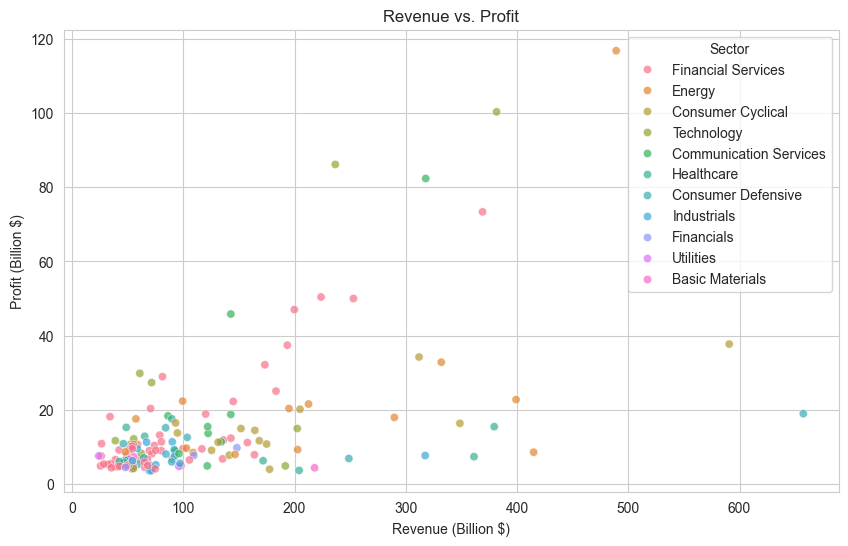

In [129]:
# Set plot style
sns.set_style("whitegrid")

# 1. Revenue vs. Profit Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Revenue (Billion $)', y='Profit (Billion $)', hue='Sector', alpha=0.7)
plt.title("Revenue vs. Profit")
plt.xlabel("Revenue (Billion $)")
plt.ylabel("Profit (Billion $)")
plt.legend(title='Sector')
plt.show()

/var/folders/bh/k3v2d3ls0nl17y_3v8vz8blm0000gn/T/ipykernel_24143/2742303688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_profit, x='Company Name', y='Profit (Billion $)', palette='coolwarm')


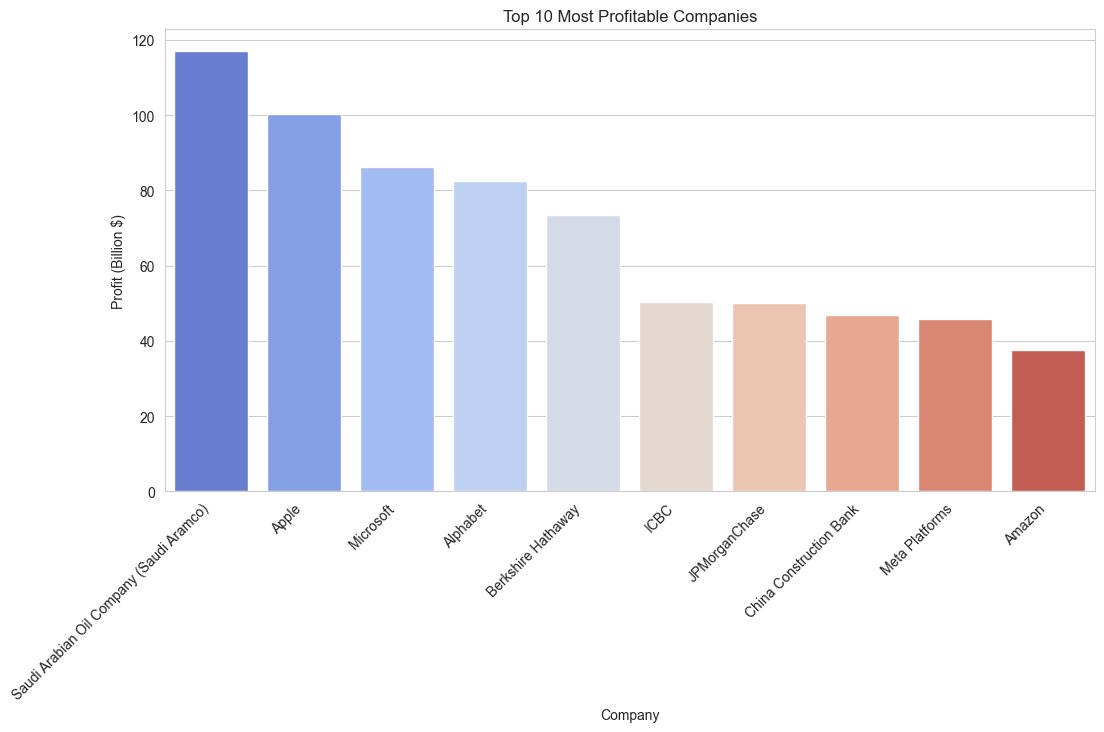

In [131]:
# 3. Top 10 Most Profitable Companies Bar Chart
top_10_profit = df.nlargest(10, 'Profit (Billion $)')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_profit, x='Company Name', y='Profit (Billion $)', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Profitable Companies")
plt.xlabel("Company")
plt.ylabel("Profit (Billion $)")
plt.show()

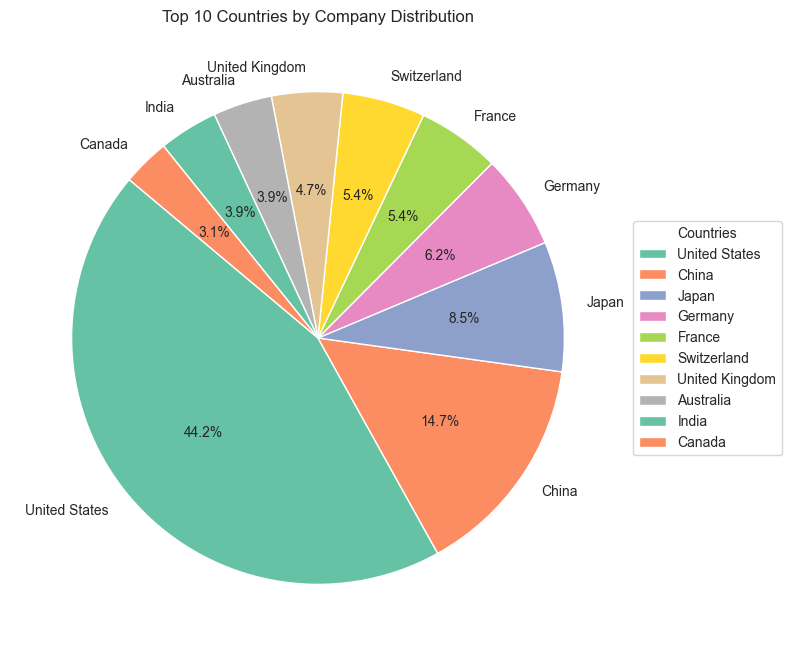

In [139]:
import seaborn as sns

country_counts = df['Country'].value_counts()
top_10_countries = country_counts.head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))

# Add the legend
plt.legend(top_10_countries.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5))

# Title for the chart
plt.title("Top 10 Countries by Company Distribution")

# Show the plot
plt.show()


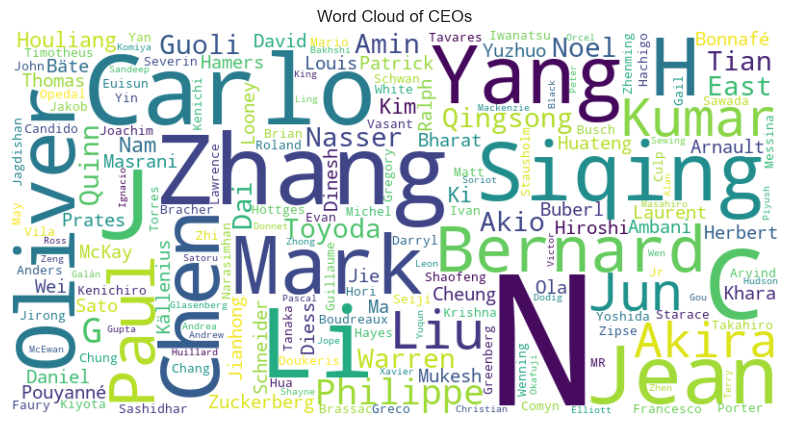

In [144]:
# 7. CEO-wise Companies Word Cloud
ceo_text = ' '.join(df['CEO'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ceo_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of CEOs")
plt.show()

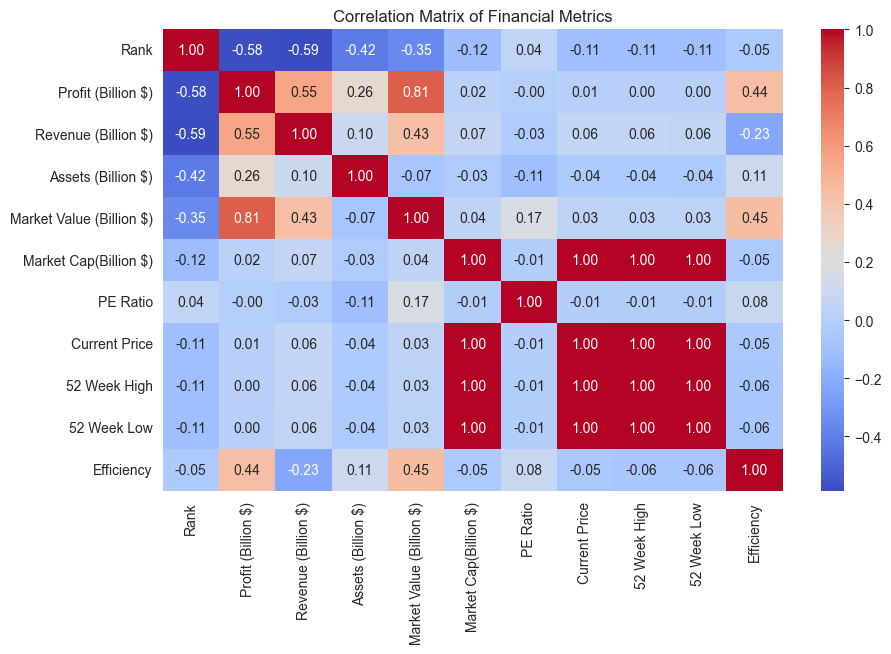

In [147]:
# 10. Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

In [156]:
import requests
import pandas as pd

# Function to get gender using the Genderize API
def get_gender(name):
    time.sleep(1) 
    response = requests.get(f"https://api.genderize.io/?name={name}")
    data = response.json()
    print(data)
    return data.get('gender', 'Unknown')

df3 = pd.read_csv('Companies_with_CEO_Cleaned4.csv')

df3['First_Name'] = df3['CEO'].apply(lambda x: x.split()[0])  
df3['Gender'] = df3['First_Name'].apply(get_gender)  

# Print the updated DataFrame (for inspection)
print(df3[['CEO', 'Gender']].head())

# Save the updated DataFrame to CSV
#df3.to_csv('Companies_with_CEO_Cleaned5.csv', index=False)  # Replace with your desired file path


{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request limit reached'}
{'error': 'Request l

In [157]:
ceo_gender_map = {
    'David S. Wichmann': 'Male',
    'C. Douglas McMillon': 'Male',
    'Kim Ki Nam': 'Male',
    'Michael K. Wirth': 'Male',
    'David M. Solomon': 'Male',
    'Mark Zuckerberg': 'Male',
    'Patrick Pouyanné': 'Male',
    'James P. Gorman': 'Male',
    'David I. McKay': 'Male',
    'Michael L. Corbat': 'Male',
    'Louis Cheung': 'Male',
    'Yang Jie': 'Male',
    'Oliver Bäte': 'Male',
    'Jean-Laurent Bonnafé': 'Male',
    'Hans E. Vestberg': 'Male',
    'Li Jianhong': 'Male',
    'Ralph Hamers': 'Male',
    'Scott Powell': 'Male',
    'Randall L. Stephenson': 'Male',
    'Ma Huateng': 'Male',
    'Hiroshi Sato': 'Male',
    'Brian L. Roberts': 'Male',
    'Daniel Zhang': 'Male',
    'Zhang Yuzhuo': 'Male',
    'Herbert Diess': 'Male',
    'Bharat Masrani': 'Male',
    'Alex Gorsky': 'Male',
    'C.C. Wei': 'Male',
    'Bernard Looney': 'Male',
    'Bernard Arnault': 'Male',
    'Mukesh Ambani': 'Male',
    'Mark Schneider': 'Male',
    'Thomas Buberl': 'Male',
    'Ola Källenius': 'Male',
    'Stephen J. Squeri': 'Male',
    'Jean Paul Prates': 'Male',
    'Dinesh Kumar Khara': 'Male',
    'Shaofeng Liu': 'Male',
    'Liu Jun': 'Male',
    'Elon R. Musk': 'Male',
    'David S. Taylor': 'Male',
    'Carlos Tavares': 'Male',
    'Oliver Zipse': 'Male',
    'Timotheus Höttges': 'Male',
    'Akira Kiyota': 'Male',
    'Larry J. Merlo': 'Male',
    'Sashidhar Jagdishan': 'Male',
    'Carlos Torres Vila': 'Male',
    'Kenichiro Yoshida': 'Male',
    'Roland Busch': 'Male',
    'Matt Comyn': 'Male',
    'MR Kumar': 'Male',
    'Mary T. Barra': 'Female',
    'Jun Sawada': 'Male',
    'Philippe Brassac': 'Male',
    'Hock E. Tan': 'Male',
    'Ramon Laguarta': 'Male',
    'Craig A. Menear': 'Male',
    'Safra A. Catz': 'Female',
    'Akira Iwanatsu': 'Male',
    'Severin Schwan': 'Male',
    'Anders Opedal': 'Male',
    'Gail Boudreaux': 'Female',
    'Yang Hua': 'Male',
    'Yin Jirong': 'Male',
    'Carlo Messina': 'Male',
    'Arvind Krishna': 'Male',
    'Evan G. Greenberg': 'Male',
    'Candido Bracher': 'Male',
    'Michel Doukeris': 'Male',
    'Richard A. Gonzalez': 'Male',
    'Charles H. Robbins': 'Male',
    'Takahiro Hachigo': 'Male',
    'Brian J. J. Porter': 'Male',
    'Euisun Chung': 'Male',
    'Francesco Starace': 'Male',
    'David M. Cordani CPA': 'Male',
    'W. Craig Jelinek': 'Male',
    'Joachim Wenning': 'Male',
    'Mario Greco': 'Male',
    'Vasant Narasimhan': 'Male',
    'James Quincey': 'Male',
    'H. Lawrence Culp Jr.': 'Male',
    'D. James Umpleby III': 'Male',
    'John C. May': 'Male',
    'Darryl White': 'Male',
    'Seiji Tanaka': 'Male',
    'Guillaume Faury': 'Male',
    'Robert H. Swan': 'Male',
    'Kenichi Hori': 'Male',
    'Ryan M. Lance': 'Male',
    'Yan Zhi': 'Male',
    'Jen-Hsun Huang': 'Male',
    'Jakob Stausholm': 'Male',
    'Chang Zhenming': 'Male',
    'Gregory J. Hayes': 'Male',
    'Ivan Glasenberg': 'Male',
    'Andrew Mackenzie': 'Male',
    'Li Zhong': 'Male',
    'Andrew Cecere': 'Male',
    'Terry Gou': 'Male',
    'Ignacio Galán': 'Male',
    'Pascal Soriot': 'Male',
    'Paul Hudson': 'Male',
    'Alan Jope': 'Male',
    'James P. Hackett': 'Male',
    'Richard D. Fairbank': 'Male',
    'Ross McEwan': 'Male',
    'Leon Black': 'Male',
    'Alfred F. Kelly Jr.': 'Male',
    'Andrea Orcel': 'Male',
    'Zeng Yuqun': 'Male',
    'Brian Duperreault': 'Male',
    'Shayne Elliott': 'Male',
    'Xavier Huillard': 'Male',
    'Li Zhen': 'Male',
    'Marc N. Casper': 'Male',
    'Walter W. Bettinger II': 'Male',
    'Susan Patricia Griffith': 'Female',
    'Piyush Gupta': 'Male',
    'Gary R. Heminger': 'Male',
    'William S. Demchak': 'Male',
    'Philippe Donnet': 'Male',
    'Sandeep Bakhshi': 'Male',
    'Masahiro Okafuji': 'Male',
    'Peter King': 'Male',
    'David P. Abney': 'Male',
    'Christian Sewing': 'Male',
    'Victor G. Dodig': 'Male',
    'Ling Wen': 'Male',
    'Satoru Komiya': 'Male',
    'James L. Robo': 'Male'
}


In [172]:

csv_file = 'Companies_with_CEO_Cleaned4.csv' 
df = pd.read_csv(csv_file)

# Add a new 'Gender' column based on the CEO names
df['Gender'] = df['CEO'].apply(lambda x: ceo_gender_map.get(x, 'Male'))

# Save the updated dataframe to a new CSV file
output_file = 'Companies_with_CEO_Cleaned5(b).csv'
df.to_csv(output_file, index=False)

print(f"Gender data has been added and saved to '{output_file}'")

Gender data has been added and saved to 'Companies_with_CEO_Cleaned5(b).csv'


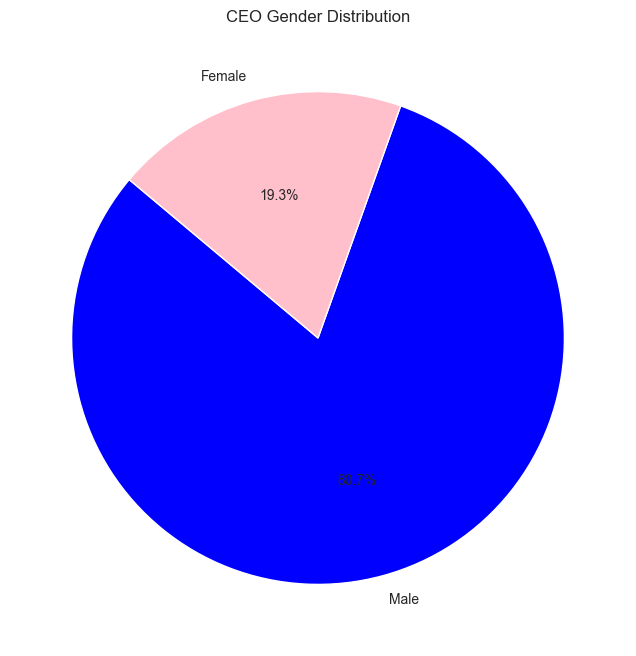

In [161]:
# 1. Gender Distribution of CEOs (Pie Chart)
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title("CEO Gender Distribution")
plt.show()

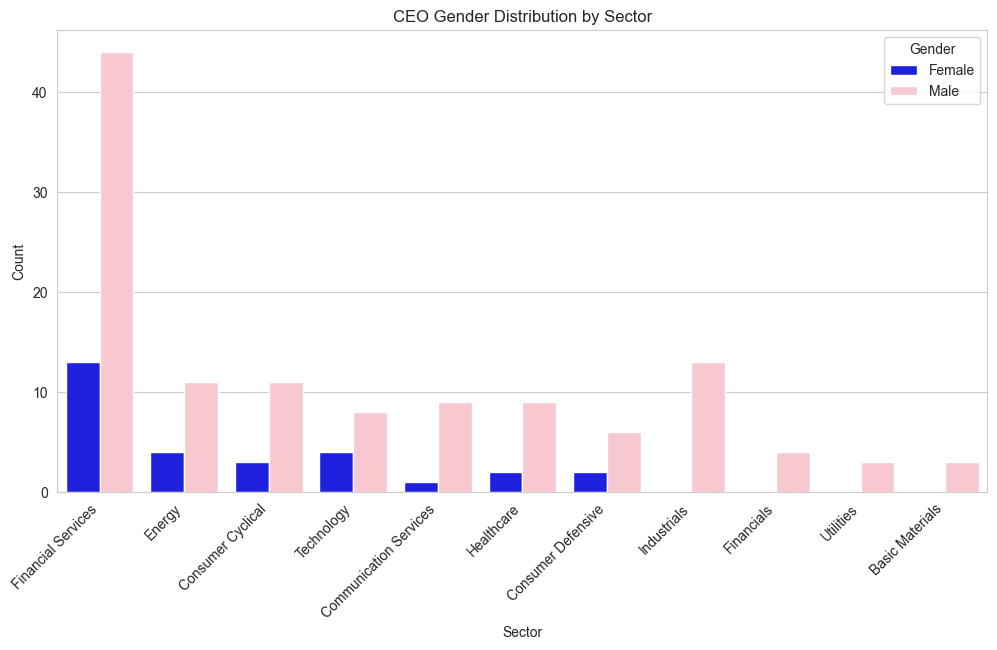

In [162]:
# 2. CEO Gender by Sector (Stacked Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sector', hue='Gender', palette=['blue', 'pink'])
plt.xticks(rotation=45, ha='right')
plt.title("CEO Gender Distribution by Sector")
plt.xlabel("Sector")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()

/var/folders/bh/k3v2d3ls0nl17y_3v8vz8blm0000gn/T/ipykernel_24143/2458505065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Market Cap(Billion $)', palette=['Green', 'Red'])


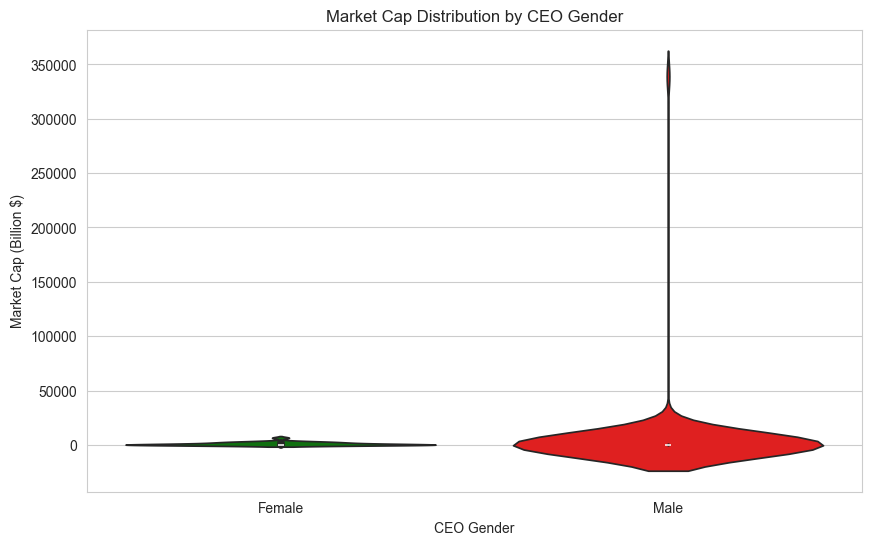

In [165]:
# 4. Market Cap vs. CEO Gender (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Market Cap(Billion $)', palette=['Green', 'Red'])
plt.title("Market Cap Distribution by CEO Gender")
plt.xlabel("CEO Gender")
plt.ylabel("Market Cap (Billion $)")
plt.show()

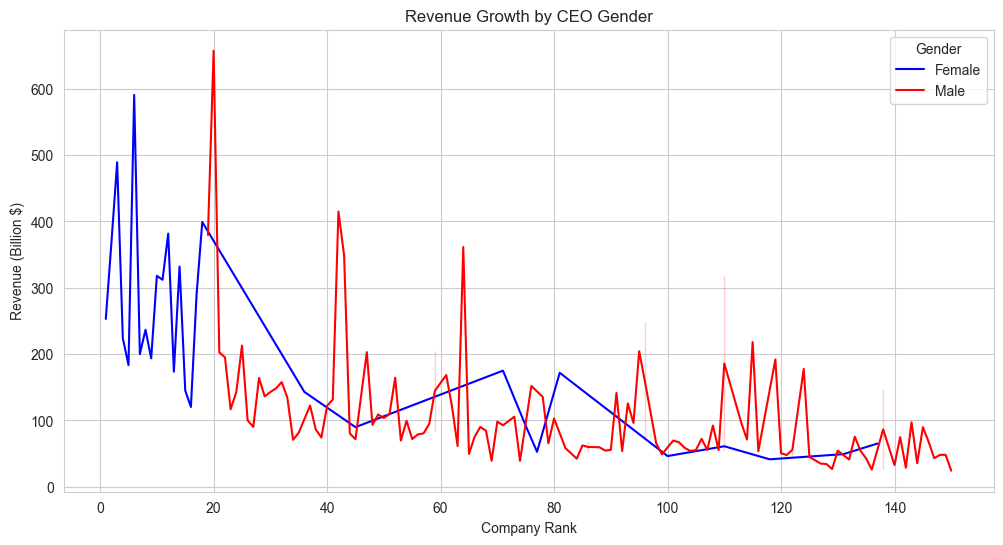

In [176]:
# 7. Revenue Growth vs. CEO Gender (Line Chart)
df = pd.read_csv('Companies_with_CEO_Cleaned5.csv')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Rank', y='Revenue (Billion $)', hue='Gender', palette=['blue', 'Red'])
plt.title("Revenue Growth by CEO Gender")
plt.xlabel("Company Rank")
plt.ylabel("Revenue (Billion $)")
plt.legend(title='Gender')
plt.show()